In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

df_main = pd.read_csv(r'C:\Users\imffb\project\EDA\new_car\starting_point_null_values_analytics.csv', low_memory=False)
df = df.drop(columns=['Unnamed: 0'])

df_main.dropna(subset=['Input_date'], inplace=True)
df_main['year'] = pd.DatetimeIndex(df_main['Input_date']).year
df_main['month'] = pd.DatetimeIndex(df_main['Input_date']).month
df_main = df_main.sort_values(by=['year','month'])
df_main['Input_year_month'] = df_main['year'].astype('str') + '-' + df_main['month'].astype(str)

display(df_main)

,Unnamed: 0,Input_date,Timestamp_sql,Cd,DOM,Ml_num,Pr_lsc,Lsc,Lp_dol,Sp_dol,Orig_dol,S_r,Br,Br_plus,Bath_tot,Num_kit,Den_fr,Sqft,Yr_built,Furnished,Patio_ter,Condo_exp,Locker,Maint,Tot_park_spcs,Parking Type,Ens_lndry,Cable,Water_inc,Hydro_inc,Prkg_inc,A_c,Taxes,Community,Zip1,Zip2,Type_own1_out,Style,Municipality,Municipality_district,County,Apt_num,Addr,Timestamp_year,month_sin,month_cos,year,month,Input_year_month
577101,577101,1/30/2010 12:00:00 AM,2022-04-03 00:05:54,NaN,2.0,W1778416,Sus,Ter,369900,NaN,369900.0,Sale,3,0,2,1,Y,1600-1799,16-30,N,Open,SE,Y,952.00,NaN,Underground,Y,Y,Y,Y,Y,Y,2968.83,Hurontario,L5R,1Y1,NaN,Apartment,Mississauga,Mississauga,Ontario,2309,55 Kingsbridge Garden Circ,2022,0.933013,0.25,2010,1,2010-1
324478,324478,1/9/2012 12:00:00 AM,2022-06-29 00:09:05,NaN,20.0,C2262068,New,Ter,499900,NaN,499900.0,Sale,1,1,1,1,N,800-899,NaN,N,Terr,SW,Y,561.00,NaN,Underground,Y,N,Y,N,Y,Y,3006.66,Niagara,M5V,1A8,NaN,Apartment,Toronto,Toronto C01,Ontario,227,637 Lake Shore Blvd W,2022,0.500000,0.00,2012,1,2012-1
408403,408403,5/8/2013 12:00:00 AM,2020-09-14 00:10:26,NaN,38.0,C2632326,New,Sus,283900,NaN,283900.0,Sale,1,0,1,1,N,500-599,0-5,N,Open,S,Y,335.28,NaN,Underground,Y,N,Y,N,N,Y,1419.00,Newtonbrook East,M2M,0A9,NaN,Apartment,Toronto,Toronto C14,Ontario,2206,5793 Yonge St,2020,0.000000,0.50,2013,5,2013-5
347471,347471,2013-07-23 00:00:00.0,2022-06-25 17:54:11,NaN,56.0,N2698867,Lsd,Dft,1350,NaN,1350.0,Lease,1,0,1,1,N,500-599,0-5,N,Open,N,Y,0.00,NaN,Underground,Y,N,N,N,Y,Y,0.00,Commerce Valley,L3T,0B5,Condo Apt,Apartment,Markham,Markham,Ontario,217,273 South Park Rd,2022,0.500000,0.00,2013,7,2013-7
432818,432818,5/23/2014 12:00:00 AM,2020-12-24 00:06:32,NaN,18.0,C2919311,Pc,Ter,550000,NaN,569900.0,Sale,2,0,2,1,N,1400-1599,6-15,N,Terr,SE,Y,685.27,NaN,Underground,Y,N,Y,N,Y,Y,2878.65,Willowdale West,M2N,5R8,NaN,Bungalow,Toronto,Toronto C07,Ontario,113,5418 Yonge St,2020,0.500000,1.00,2014,5,2014-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633759,633759,2022-09-13 00:00:00.0,2022-09-13 12:52:12,NaN,0.0,X5761418,NaN,New,1900000,NaN,1900000.0,Sale,4,0,2,1,N,2250-2499,NaN,N,NaN,NaN,NaN,NaN,>4,None,NaN,NaN,NaN,NaN,NaN,Y,3296.00,Rural East Garafraxa,L9W,7J9,NaN,2-Storey,East Garafraxa,East Garafraxa,Ontario,NaN,101117 10 Sdrd,2022,0.000000,0.50,2022,9,2022-9
633760,633760,2022-09-13 00:00:00.0,2022-09-13 12:51:46,NaN,0.0,X5761424,NaN,New,439900,NaN,439900.0,Sale,4,0,2,1,N,1600-1799,51-99,N,NaN,NaN,NaN,NaN,>4,Detached Garage,NaN,NaN,NaN,NaN,NaN,Y,2652.95,Lindsay,K9V,4R1,NaN,Bungalow,Kawartha Lakes,Kawartha Lakes,Ontario,NaN,1785 Peniel Rd,2022,0.000000,0.50,2022,9,2022-9
633761,633761,2022-09-13 00:00:00.0,2022-09-13 12:57:31,NaN,0.0,X5761435,NaN,New,665000,NaN,665000.0,Sale,3,0,2,1,N,1200-1399,31-50,N,NaN,NaN,NaN,NaN,>4,Attached Garage,NaN,NaN,NaN,NaN,NaN,Y,2615.50,Dunnville,N1A,1L7,NaN,NaN,Haldimand,Haldimand,Ontario,NaN,289 Brookfield Blvd,2022,0.000000,0.50,2022,9,2022-9
633762,633762,2022-09-13 00:00:00.0,2022-09-13 12:58:43,NaN,0.0,X5761440,NaN,New,899900,NaN,899900.0,Sale,2,0,2,1,Y,1600-1799,16-30,N,NaN,NaN,NaN,NaN,4.0,Attached Garage,NaN,NaN,NaN,NaN,NaN,Y,6737.45,NaN,L3B,6G7,NaN,Bungalow,Welland,Welland,Ontario,NaN,46 Muirfield Tr,2022,0.000000,0.50,2022,9,2022-9


Gets initial dataframe. 'year', 'month', and 'Input_year_month' columns are created.

In [7]:
import datetime

df_main['months_up'] = df_main['Input_date'].astype('datetime64[ns]')
df_main['Input_year_month'] = df_main['Input_year_month'].astype('datetime64[ns]')

#Input_date -> DOM
df_main['date_sold'] = df_main['months_up'] + pd.to_timedelta(df_main['DOM'], unit='D')
df_main['date_sold'] = df_main['date_sold'].astype('datetime64[ns]').dt.strftime('%Y-%m')
df_main = df_main.dropna(subset=['date_sold'])
df_main['months_up'] = df_main.apply(lambda x: pd.date_range(start=x['Input_year_month'], end=x['date_sold'], freq='MS').tolist(), axis=1)
df_main['months_up'] = [[y.strftime('%Y-%#m') for y in x] for x in df_main['months_up']]
df_main['date_sold'] = df_main['date_sold'].astype('datetime64[ns]').dt.strftime('%Y-%#m')
df_main['Input_year_month'] = df_main['year'].astype('str') + '-' + df_main['month'].astype(str)

display(df_main)

<ipython-input-7-91d220b61fbc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['months_up'] = df_main.apply(lambda x: pd.date_range(start=x['Input_year_month'], end=x['date_sold'], freq='MS').tolist(), axis=1)
<ipython-input-7-91d220b61fbc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['months_up'] = [[y.strftime('%Y-%#m') for y in x] for x in df_main['months_up']]
<ipython-input-7-91d220b61fbc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Unnamed: 0,Input_date,Timestamp_sql,Cd,DOM,Ml_num,Pr_lsc,Lsc,Lp_dol,Sp_dol,Orig_dol,S_r,Br,Br_plus,Bath_tot,Num_kit,Den_fr,Sqft,Yr_built,Furnished,Patio_ter,Condo_exp,Locker,Maint,Tot_park_spcs,Parking Type,Ens_lndry,Cable,Water_inc,Hydro_inc,Prkg_inc,A_c,Taxes,Community,Zip1,Zip2,Type_own1_out,Style,Municipality,Municipality_district,County,Apt_num,Addr,Timestamp_year,month_sin,month_cos,year,month,Input_year_month,months_up,date_sold
577101,577101,1/30/2010 12:00:00 AM,2022-04-03 00:05:54,NaN,2.0,W1778416,Sus,Ter,369900,NaN,369900.0,Sale,3,0,2,1,Y,1600-1799,16-30,N,Open,SE,Y,952.00,NaN,Underground,Y,Y,Y,Y,Y,Y,2968.83,Hurontario,L5R,1Y1,NaN,Apartment,Mississauga,Mississauga,Ontario,2309,55 Kingsbridge Garden Circ,2022,0.933013,0.25,2010,1,2010-1,"[2010-1, 2010-2]",2010-2
324478,324478,1/9/2012 12:00:00 AM,2022-06-29 00:09:05,NaN,20.0,C2262068,New,Ter,499900,NaN,499900.0,Sale,1,1,1,1,N,800-899,NaN,N,Terr,SW,Y,561.00,NaN,Underground,Y,N,Y,N,Y,Y,3006.66,Niagara,M5V,1A8,NaN,Apartment,Toronto,Toronto C01,Ontario,227,637 Lake Shore Blvd W,2022,0.500000,0.00,2012,1,2012-1,[2012-1],2012-1
408403,408403,5/8/2013 12:00:00 AM,2020-09-14 00:10:26,NaN,38.0,C2632326,New,Sus,283900,NaN,283900.0,Sale,1,0,1,1,N,500-599,0-5,N,Open,S,Y,335.28,NaN,Underground,Y,N,Y,N,N,Y,1419.00,Newtonbrook East,M2M,0A9,NaN,Apartment,Toronto,Toronto C14,Ontario,2206,5793 Yonge St,2020,0.000000,0.50,2013,5,2013-5,"[2013-5, 2013-6]",2013-6
347471,347471,2013-07-23 00:00:00.0,2022-06-25 17:54:11,NaN,56.0,N2698867,Lsd,Dft,1350,NaN,1350.0,Lease,1,0,1,1,N,500-599,0-5,N,Open,N,Y,0.00,NaN,Underground,Y,N,N,N,Y,Y,0.00,Commerce Valley,L3T,0B5,Condo Apt,Apartment,Markham,Markham,Ontario,217,273 South Park Rd,2022,0.500000,0.00,2013,7,2013-7,"[2013-7, 2013-8, 2013-9]",2013-9
432818,432818,5/23/2014 12:00:00 AM,2020-12-24 00:06:32,NaN,18.0,C2919311,Pc,Ter,550000,NaN,569900.0,Sale,2,0,2,1,N,1400-1599,6-15,N,Terr,SE,Y,685.27,NaN,Underground,Y,N,Y,N,Y,Y,2878.65,Willowdale West,M2N,5R8,NaN,Bungalow,Toronto,Toronto C07,Ontario,113,5418 Yonge St,2020,0.500000,1.00,2014,5,2014-5,"[2014-5, 2014-6]",2014-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633759,633759,2022-09-13 00:00:00.0,2022-09-13 12:52:12,NaN,0.0,X5761418,NaN,New,1900000,NaN,1900000.0,Sale,4,0,2,1,N,2250-2499,NaN,N,NaN,NaN,NaN,NaN,>4,None,NaN,NaN,NaN,NaN,NaN,Y,3296.00,Rural East Garafraxa,L9W,7J9,NaN,2-Storey,East Garafraxa,East Garafraxa,Ontario,NaN,101117 10 Sdrd,2022,0.000000,0.50,2022,9,2022-9,[2022-9],2022-9
633760,633760,2022-09-13 00:00:00.0,2022-09-13 12:51:46,NaN,0.0,X5761424,NaN,New,439900,NaN,439900.0,Sale,4,0,2,1,N,1600-1799,51-99,N,NaN,NaN,NaN,NaN,>4,Detached Garage,NaN,NaN,NaN,NaN,NaN,Y,2652.95,Lindsay,K9V,4R1,NaN,Bungalow,Kawartha Lakes,Kawartha Lakes,Ontario,NaN,1785 Peniel Rd,2022,0.000000,0.50,2022,9,2022-9,[2022-9],2022-9
633761,633761,2022-09-13 00:00:00.0,2022-09-13 12:57:31,NaN,0.0,X5761435,NaN,New,665000,NaN,665000.0,Sale,3,0,2,1,N,1200-1399,31-50,N,NaN,NaN,NaN,NaN,>4,Attached Garage,NaN,NaN,NaN,NaN,NaN,Y,2615.50,Dunnville,N1A,1L7,NaN,NaN,Haldimand,Haldimand,Ontario,NaN,289 Brookfield Blvd,2022,0.000000,0.50,2022,9,2022-9,[2022-9],2022-9
633762,633762,2022-09-13 00:00:00.0,2022-09-13 12:58:43,NaN,0.0,X5761440,NaN,New,899900,NaN,899900.0,Sale,2,0,2,1,Y,1600-1799,16-30,N,NaN,NaN,NaN,NaN,4.0,Attached Garage,NaN,NaN,NaN,NaN,NaN,Y,6737.45,NaN,L3B,6G7,NaN,Bungalow,Welland,Welland,Ontario,NaN,46 Muirfield Tr,2022,0.000000,0.50,2022,9,2022-9,[2022-9],2022-9


'months_up' and 'date_sold' columns added. Months_up is the list of months that the listing remained up; Date_sold is the month that the listing was sold based on the input date + the days on the market (DOM)

In [8]:
df_relisted = df_main.loc[df_main.duplicated(['Br','Br_plus','Bath_tot','Num_kit','Den_fr','Sqft','Furnished','Patio_ter','Condo_exp','Community','Zip1','Zip2','Municipality','Municipality_district','County','Addr','Apt_num'])].copy()
df_relisted['Input_date'] = pd.to_datetime(df_relisted['Input_date'], errors='coerce')
df_relisted = df_relisted.dropna(subset=['Apt_num'])

df_relisted = df_relisted.sort_values(by=['Addr','Apt_num','S_r'])

indexes=[]
for addr in df_relisted['Addr'].unique():
    for apt in df_relisted.loc[df_relisted['Addr']==addr]['Apt_num'].unique():
        #Groups by addr and apt
        df_rel = df_relisted.loc[(df_relisted['Addr']==addr) & (df_relisted['Apt_num']==apt)]
        
        #Isolate whether the df has the right set of circumstances (leased right after sold)
        if len(df_rel)<2:
            continue
        elif len(df_rel['S_r'].unique())<2:
            continue
        
        df_rel_lease = df_rel.loc[df_rel['S_r']=='Lease'].index.values
        for index in df_rel_lease:
            lease_date = df_rel.loc[index,'Input_date']
            other_dates = df_rel['Input_date'].tolist()
            other_dates.remove(lease_date)
            
            #Margin of 30 days to go from sold to leased
            if any([(abs(lease_date-x).days)<30 for x in other_dates]):
                indexes.append(index)

df_sold_then_leased = df_relisted.loc[indexes]

Firstly a new df, 'df_relisted' is created. This df represents the listings that are recognized as duplicate values based on the condo information and more importantly, the address and apt_num.

For each different address and apt_num at each address, a df corresponding to that condo is isolated. It is checked specifically whether there are multiple listings for the same condo and that it was leased AND sold. For each time the condo was leased, the date is cross-referenced with each time the condo was sold. Any time it is recognized that the difference in dates is less than 30 days (ie. the condo was listed for lease less than 30 days after the same condo was sold), the index is recorded.

Finally, the indexes are used to isolate specifically the condos that were leased 30 days after the same condo was sold.

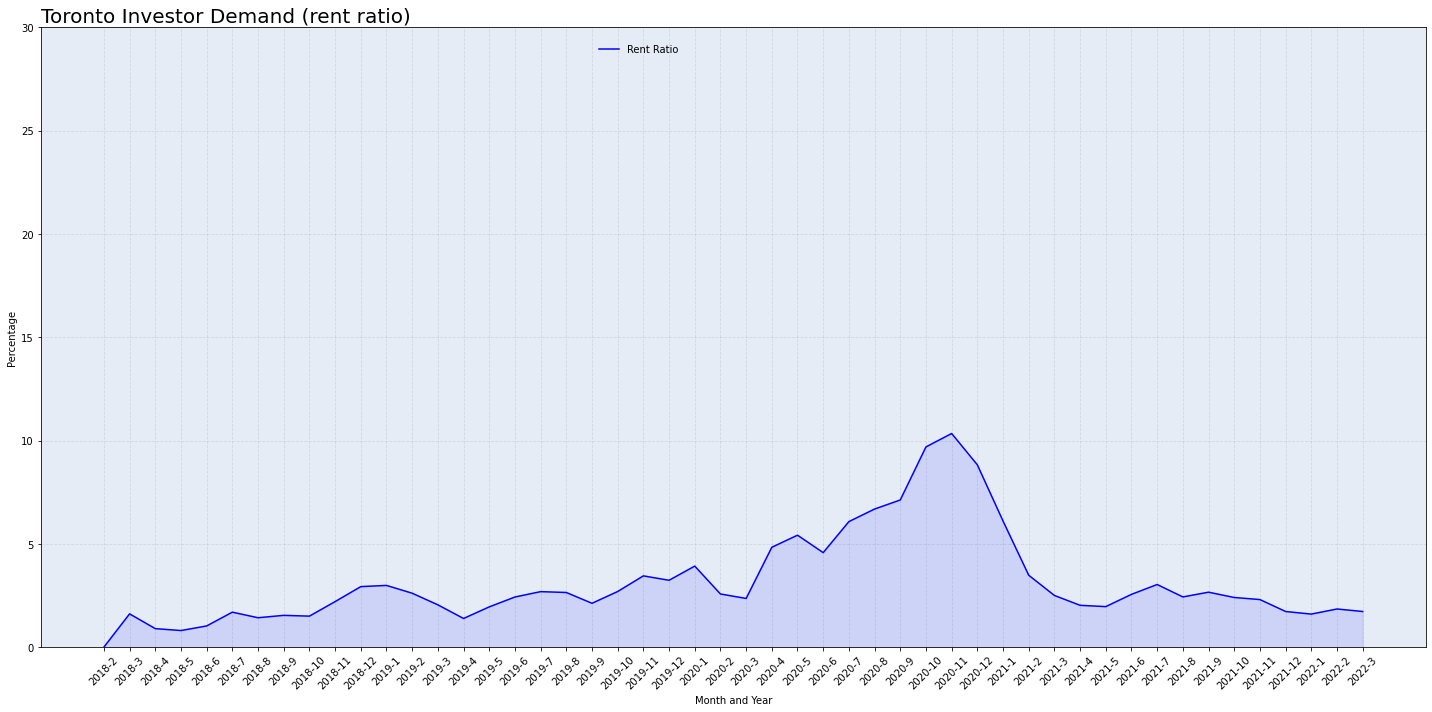

In [10]:
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import matplotlib as mpl
import scipy.stats as sp
import numpy as np
import statistics
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import numpy as np

def weird_division(n, d):
    return n / d if d else 0


df_sold = df_main.loc[(df_main['Lsc']=='Sld') | (df_main['Lsc']=='Sc')]

#Dates
date_min = list((df_sold['Input_year_month']).unique())[0]
date_max = list((df_sold['Input_year_month']).unique())[-1]
dates = []
for year in range(int(date_min.split('-')[0]), int(date_max.split('-')[0])+1):
    if year == int(date_min.split('-')[0]):
        x = int(date_min.split('-')[1])
    else:
        x = 1
    while x < 13:
        dates.append('{}-{}'.format(str(year),str(x)))
        if year == int(date_max.split('-')[0]) and x == int(date_max.split('-')[1]):
            break
        x+=1
#Incomplete data after this date (the website shows the same)
dates = dates[(dates.index('2018-2')):(dates.index('2022-4'))]

#Total
total = []
sold_date_list = df_sold['date_sold'].astype('datetime64[ns]').dt.strftime('%Y-%#m').tolist()
for x in dates:
    if x not in df_sold['Input_year_month'].unique():
        total.append(0)
        continue
    total.append(sold_date_list.count(x))

#Total sold then leased (stl)
total_stl = []
sold_date_list = df_sold_then_leased['date_sold'].astype('datetime64[ns]').dt.strftime('%Y-%#m').tolist()
for x in dates:
    if x not in df_sold['Input_year_month'].unique():
        total_stl.append(0)
        continue
    total_stl.append(sold_date_list.count(x))
    
percentage = [weird_division(i, j)*100 for i, j in zip(total_stl, total)]


fig, ax = plt.subplots(figsize=(20, 10))
y_pos = np.arange(len(dates))
ax.set_axisbelow(True)
ax.set_facecolor('#e5ecf6')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.plot(dates, percentage, color='blue', label='Rent Ratio')
ax.tick_params(axis='x', labelrotation=45)
ax.set_xlabel('Month and Year')
ax.set_ylabel('Percentage')
ax.grid(axis='y', color='grey', linestyle='dashed', alpha=0.2)
ax.grid(axis='x', color='grey', linestyle='dashed', alpha=0.2)
ax.set_ylim([0,30])
ax.legend(loc=(0.4,0.95), frameon=False)

plt.title('Toronto Investor Demand (rent ratio)', fontsize='20', loc='left')

ax.fill_between(dates, percentage, alpha=0.1, color='blue')
plt.tight_layout()
plt.show()


A df 'df_sold' is created. df_sold represents the listings from the main df that have either 'sold' or 'sold conditional' statuses. Based on the dates in the dataset, a count is done an a list is created called 'total' which outlines the frequency or count of these listings for each month and year. The same is done for the now isolated sold_then_leased dataframe. This gives us the amount of times per month that a listing was leased right after being sold, and also the total sold in that month. The lists are divided to provide a percentage which is represented by the chart.

The function weird_division is just used because to get around the divide by zero error that comes from the potential inaccuracy from the sold listings status.